# Regression Analysis

Predictive modeling involves predicting a variable of interest relating to an observation, based upon other attributes we know about that observation.  

One approach to doing so is to start by specifying the structure of the model with certain numeric parameters left unspecified.  These ‘unspecified parameters’ are then calculated in a way as to fit the available data as closely as possible.  This general approach is called parametric modeling.  

There are other approaches as well, for example with decision trees we find ever more ‘pure’ subsets by partitioning data based on the independent variables.  

Linear regression belongs to the former category, ie, we specify a general model ($y = \alpha + \beta_1 x_1 + \beta_2 x_2 + ... + \epsilon$) and calculate the parameters (the coefficients).  

The linear model assumes that the relations between variables can be summarized by a straight line.  

Linear regression is used extensively in industry, finance and practically all forms of research.  A huge advantage of regression models is their explainability as we can see the equations used to predict the target variable.  

**Univariate Regression**  
Regression with a single dependent variable y whose value is dependent upon the independent variable x is expressed as $y = \alpha + \beta x + \epsilon$ where $\alpha$ is a constant, so is $\beta$. $x$ is the independent variable and $\epsilon$ is the error term (more on the error term later).   

Given a set of data points, it is fairly easy to calculate alpha and beta – and while it can be done manually, it can be also be done using Excel using the SLOPE (for calculating β) and the INTERCEPT (α) functions.  

If done manually, beta is calculated as:  
> $\beta$ = covariance of the two variables / variance of the independent variable  
    
Once beta is known, alpha can be calculated as  
> $\alpha$ = mean of the dependent variable (ie $y$) - $\beta$ * mean of the independent variable (ie $x$)  

**Predictions**  
Once $\alpha$ and $\beta$ are known, it is probably possible to say that we can ‘predict’ $y$ if we know the value of $x$.  
  
The ‘predicted’ value of $y$ is provided to us by the regression equation. This is unlikely to be exactly equal to the actual observed value of $y$.  
  
The difference between the two is explained by the error term - $\epsilon$. This is a random ‘error’ – error not in the sense of being a mistake – but in the sense that the value predicted by the regression equation is not equal to the actual observed value.   


**An Example**  
Instead of spending more time on the theory behind regression, let us jump right into an example.  We have the _mpg_ datset where we know the miles-per-gallon for a set of cars, and also other attributes related to the car such as the number of cylinders, engine size (displacement) etc.

We can try to set up a regression  model where we attempt to predict the miles-per-gallon (mpg) from the rest of the columns in the dataset. 


**Usual library imports first**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing as preproc
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

## OLS Regression
### Load mtcars dataset

Consider the mtcars dataset.  It has data for 32 cars, 11 variables for each.  

 | mpg | Miles/(US) gallon | 
 |---|---|
 | cyl | Number of cylinders | 
 | disp | Displacement (cu.in.) | 
 | hp | Gross horsepower | 
 | drat | Rear axle ratio | 
 | wt | Weight (1000 lbs) | 
 | qsec | 1/4 mile time | 
 | vs | Engine (0 = V-shaped, 1 = straight) | 
 | am | Transmission (0 = auto, 1 = manual) | 
 | gear | Number of forward gears | 




Can we calculate miles-per-gallon (mpg) for a car based on the other variables?  


In [3]:
# Let us load the data and look at some sample columns

mtcars = sm.datasets.get_rdataset('mtcars').data
mtcars.sample(4)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2


In [4]:
mtcars.shape

(32, 11)

In [5]:
# List the column names

mtcars.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

### Split dataset between X (features, or predictors) and y (target)  

The `mpg` column contains the target, or the y variable.  This is the first column in our dataset.  The rest of the variables will be used as predictors, or the X variables.  

We want to create a model with an intercept.  In Statsmodels, that requires us to use the function `add_constant` as shown below.  

In [6]:
y = mtcars.mpg.values

# sm.add_constant adds a column to the dataframe with 1.0 as a constant
features = mtcars.iloc[:,1:]
X = sm.add_constant(features)

Now let us look at our `X` and `y` data.

In [7]:
# miles per gallon, the y variable

y

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

In [8]:
# Predictors, the X array

X.head()

,const,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,1.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,1.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,1.0,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,1.0,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,1.0,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
# Let us check if the shape of the different dataframes is what we would expect them to be

print('Shape of the original mtcars dataset (rows x columns):', mtcars.shape)
print('Shape of the X dataframe, has a new col for constant (rows x columns):', X.shape)
print('Shape of the features dataframe (rows x columns):', features.shape)

Shape of the original mtcars dataset (rows x columns): (32, 11)
Shape of the X dataframe, has a new col for constant (rows x columns): (32, 11)
Shape of the features dataframe (rows x columns): (32, 10)


### Build model and obtain summary

In [10]:
# Now that we have defined X and y, we can easily fit a regression model to this data

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           3.79e-07
Time:                        11:10:14   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

At this point, the model itself is contained in an object called `model`.

What this model is saying is as follows: 

$mpg = 12.3034 - (0.1114 \times cyl) + (0.0133 \times disp) - (0.0215 \times hp) + ...$

**How do you calculate P>|t| in the table above?**

A useful function for the t-distribution is the t function available from scipy.
t.cdf gives us the area under the curve from -∞ to the value of x provided, ie
it gives area under the curve (-∞, x].

The distance from 0 in terms of multiples of standard deviation tells you how far the coefficient is from zero.  The farther it is, the likelier that its value is not a fluke, and it is indeed different from zero. 

So the right tail is the area under the curve, but you have to multiply that by two as you need to see the area under the curve on both sides of zero.

In [11]:
# for the 'cyl' coefficient above, the t value is (or distance from zero in terms of SD) is -0.107

from scipy.stats import t 
t.cdf(x = -0.107, df = 21) * 2

0.9158046158959711

### Use Model to Perform Predictions

Once the model is created, creating predictions is easy.  We do so with the `predict` method on the `model` object we just created.  In fact, this is the way we will be doing predictions for all models, not just regression.  

In [12]:
model.predict(X)

rownames
Mazda RX4              22.599506
Mazda RX4 Wag          22.111886
Datsun 710             26.250644
Hornet 4 Drive         21.237405
Hornet Sportabout      17.693434
Valiant                20.383039
Duster 360             14.386256
Merc 240D              22.496012
Merc 230               24.419090
Merc 280               18.699030
Merc 280C              19.191654
Merc 450SE             14.172162
Merc 450SL             15.599574
Merc 450SLC            15.742225
Cadillac Fleetwood     12.034013
Lincoln Continental    10.936438
Chrysler Imperial      10.493629
Fiat 128               27.772906
Honda Civic            29.896739
Toyota Corolla         29.512369
Toyota Corona          23.643103
Dodge Challenger       16.943053
AMC Javelin            17.732181
Camaro Z28             13.306022
Pontiac Firebird       16.691679
Fiat X1-9              28.293469
Porsche 914-2          26.152954
Lotus Europa           27.636273
Ford Pantera L         18.870041
Ferrari Dino           19.693828
M

In [13]:
# Let us look at what the model object prints as.
# It is really a black box

model

**But how do we know this model is any good?**  
Intuition tells us that the model will be good if its predictions are close to what the actual observations are.  So we can calculate the predicted values of mpg, and compare them to the actual values.   

Let us do that next - we compare the actual mpg to predicted mpg.  

In [14]:
preds = pd.DataFrame(model.predict(X), index = list(mtcars.index), columns = ['pred'])

compare = pd.DataFrame(mtcars['mpg'])
compare['pred'] = preds.pred
compare['difference'] = compare.mpg - compare.pred

compare


,mpg,pred,difference
rownames,,,
Mazda RX4,21.0,22.599506,-1.599506
Mazda RX4 Wag,21.0,22.111886,-1.111886
Datsun 710,22.8,26.250644,-3.450644
Hornet 4 Drive,21.4,21.237405,0.162595
Hornet Sportabout,18.7,17.693434,1.006566
Valiant,18.1,20.383039,-2.283039
Duster 360,14.3,14.386256,-0.086256
Merc 240D,24.4,22.496012,1.903988
Merc 230,22.8,24.419090,-1.619090


In [15]:
round(compare.difference.describe(),3)

count    32.000
mean      0.000
std       2.181
min      -3.451
25%      -1.604
50%      -0.120
75%       1.219
max       4.627
Name: difference, dtype: float64

***
## Assessing the regression model
Next let us look at some formal methods of assessing regression

### Standard Error of Regression

Conceptually, the standard error of regression is the same as the standard deviation we calculated above from the differences between actual and predicted values.  However, it is not mathematically pure and we have to consider the degrees of freedom to get the actual value, which we call the standard error of regression.  


The standard error of regression takes into account the degrees of freedom lost due to the number of regressors in the model, and the number of observations the model is based on.  It it considered a more accurate representation of the standard error of regression than the crude standard deviation calculation we did earlier.

In [16]:
# Calculated as:
model.mse_resid**.5

2.650197027865509

In [17]:
# Also as:
np.sqrt(np.sum(model.resid**2)/model.df_resid)

2.650197027865509

In [18]:
# Also calculated directly from the model as
model.scale**.5

2.650197027865509

`model.resid` is the residuals, and `model.df_resid` is the degrees of freedom for the model residuals

In [19]:
print(model.resid)
print('\nCount of items above = ', len(model.resid))

rownames
Mazda RX4             -1.599506
Mazda RX4 Wag         -1.111886
Datsun 710            -3.450644
Hornet 4 Drive         0.162595
Hornet Sportabout      1.006566
Valiant               -2.283039
Duster 360            -0.086256
Merc 240D              1.903988
Merc 230              -1.619090
Merc 280               0.500970
Merc 280C             -1.391654
Merc 450SE             2.227838
Merc 450SL             1.700426
Merc 450SLC           -0.542225
Cadillac Fleetwood    -1.634013
Lincoln Continental   -0.536438
Chrysler Imperial      4.206371
Fiat 128               4.627094
Honda Civic            0.503261
Toyota Corolla         4.387631
Toyota Corona         -2.143103
Dodge Challenger      -1.443053
AMC Javelin           -2.532181
Camaro Z28            -0.006022
Pontiac Firebird       2.508321
Fiat X1-9             -0.993469
Porsche 914-2         -0.152954
Lotus Europa           2.763727
Ford Pantera L        -3.070041
Ferrari Dino           0.006172
Maserati Bora          1.058882

In [20]:
model.df_resid

21.0

### Goodness of fit, R-squared

**R-squared is the square of the correlation betweeen actual and predicted values**    

Intuitively, we would also like to see a high correlation between predictions and observed values.
We have the predicted and observed values, so calculating the R-squared is easy.  (R-squared is also called coefficient of determination.)

In [21]:
# Calculate the correlations between actual and predicted

round(compare.corr(), 6)

,mpg,pred,difference
mpg,1.000000,0.93221,0.361917
pred,0.932210,1.00000,-0.000000
difference,0.361917,-0.00000,1.000000


In [22]:
# Squaring the correlations gives us the R-squared 

round(compare.corr()**2, 6)

,mpg,pred,difference
mpg,1.000000,0.869016,0.130984
pred,0.869016,1.000000,0.000000
difference,0.130984,0.000000,1.000000


In [23]:
# Why did we use the function `round` above?
# To avoid the scientific notation and make the 
# results easier to read.  For example, without
# using the rounding we get the below result.

compare.corr()**2

,mpg,pred,difference
mpg,1.000000,8.690158e-01,1.309842e-01
pred,0.869016,1.000000e+00,2.538254e-27
difference,0.130984,2.538254e-27,1.000000e+00


### Root mean squared error  
The RMSE is just the square root of the average squared errors.  It is the same as if we had calculated the population standard deviation based on the residuals.

RMSE is normally calculated for the test set, because for the training data we have the standard error of regression.  

Let us calculate it here for the entire dataset as we did not do a train-test split for this example.

In [24]:
mean_squared_error(compare.pred, compare.mpg) **.5

2.1469049671609444

### Mean Absolute Error
This is the average difference between the actual and the predicted values, ignoring the sign of the difference.  

In [25]:
mean_absolute_error(compare.pred, compare.mpg)

1.7227401628911079

### Understanding the F-statistic, and its p-value
The R-squared is a key statistic for evaluating regression.  But it is also a statistical quantity, which means it is an estimate around which exists a confidence interval.    

Estimates follow distributions, and often we see statements such as a particular variable follows the normal or lognormal distribution.  The value of R2 follows what is called an F-distribution. 

The F-distribution has two parameters – the degrees of freedom for each of the two variables ESS and TSS that have gone into calculating R2. The F-distribution has a minimum of zero, and approaches zero to the right of the distribution. In order to test the significance of R2, one needs to calculate the F statistic.
Then we need to find out how likely is that value of the F-stat to have been obtained by chance – lower this likelihood, the better it is.

The question arises as to how ‘significant’ is any given value of R2? Could this have been zero, and we just happened randomly to get a value of 0.86?  

The F-test of overall significance is the hypothesis test for this relationship. If the overall F-test is significant, you can conclude that R-squared does not equal zero, and the correlation between the model and dependent variable is statistically significant.

To do this test, we calculate the F statistic, and its p-value.  If the p-value is less than our desired level of significance (say, 5%, or 95% confidence level), then we believe the value was not arrived at by chance.  This is the standard hypothesis testing piece.  

$\mbox{F-stat} = \frac{\frac{\mbox{Explained sum of squares}}{\mbox{Degrees of Freedom of the model}}}{\frac{\mbox{Residual sum of squares}}{\mbox{Degrees of Freedom fo the Residuals}}}$

Fortunately, the F-stat, and its p-value can be easily obtained in Python, and we do not need to worry about calculations.



In [26]:
# F stat=  (explained variance) / (unexplained variance)
# F stat = (ESS/DFM) / (RSS/DFE)

(model.ess/model.df_model) / (np.sum(model.resid**2)/model.df_resid)


13.932463690208827

In [27]:
# p value for F stat
import scipy
1-(scipy.stats.f.cdf(model.fvalue, model.df_model, model.df_resid))

3.7931521057466e-07

In [28]:
# Getting f value directly from statsmodels
model.fvalue

13.932463690208827

In [29]:
# Getting the p value of the f statistic directly from statsmodels
model.f_pvalue

3.7931521053058665e-07

In [30]:
# Source: http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
# Degrees of Freedom for Model, p-1, where p is number of regressors  

dfm = model.df_model
dfm

10.0

In [31]:
# n-p, Deg Fdm for Errors, where n is number of observations, and p is number of regressors
model.df_resid

21.0

### Understanding the model summary

With what we now know about R-squared, the F-statistic, and the coefficients, we can revisit our model summary that statsmodels produced for us.  The below graphic explains how to read the model summary.  

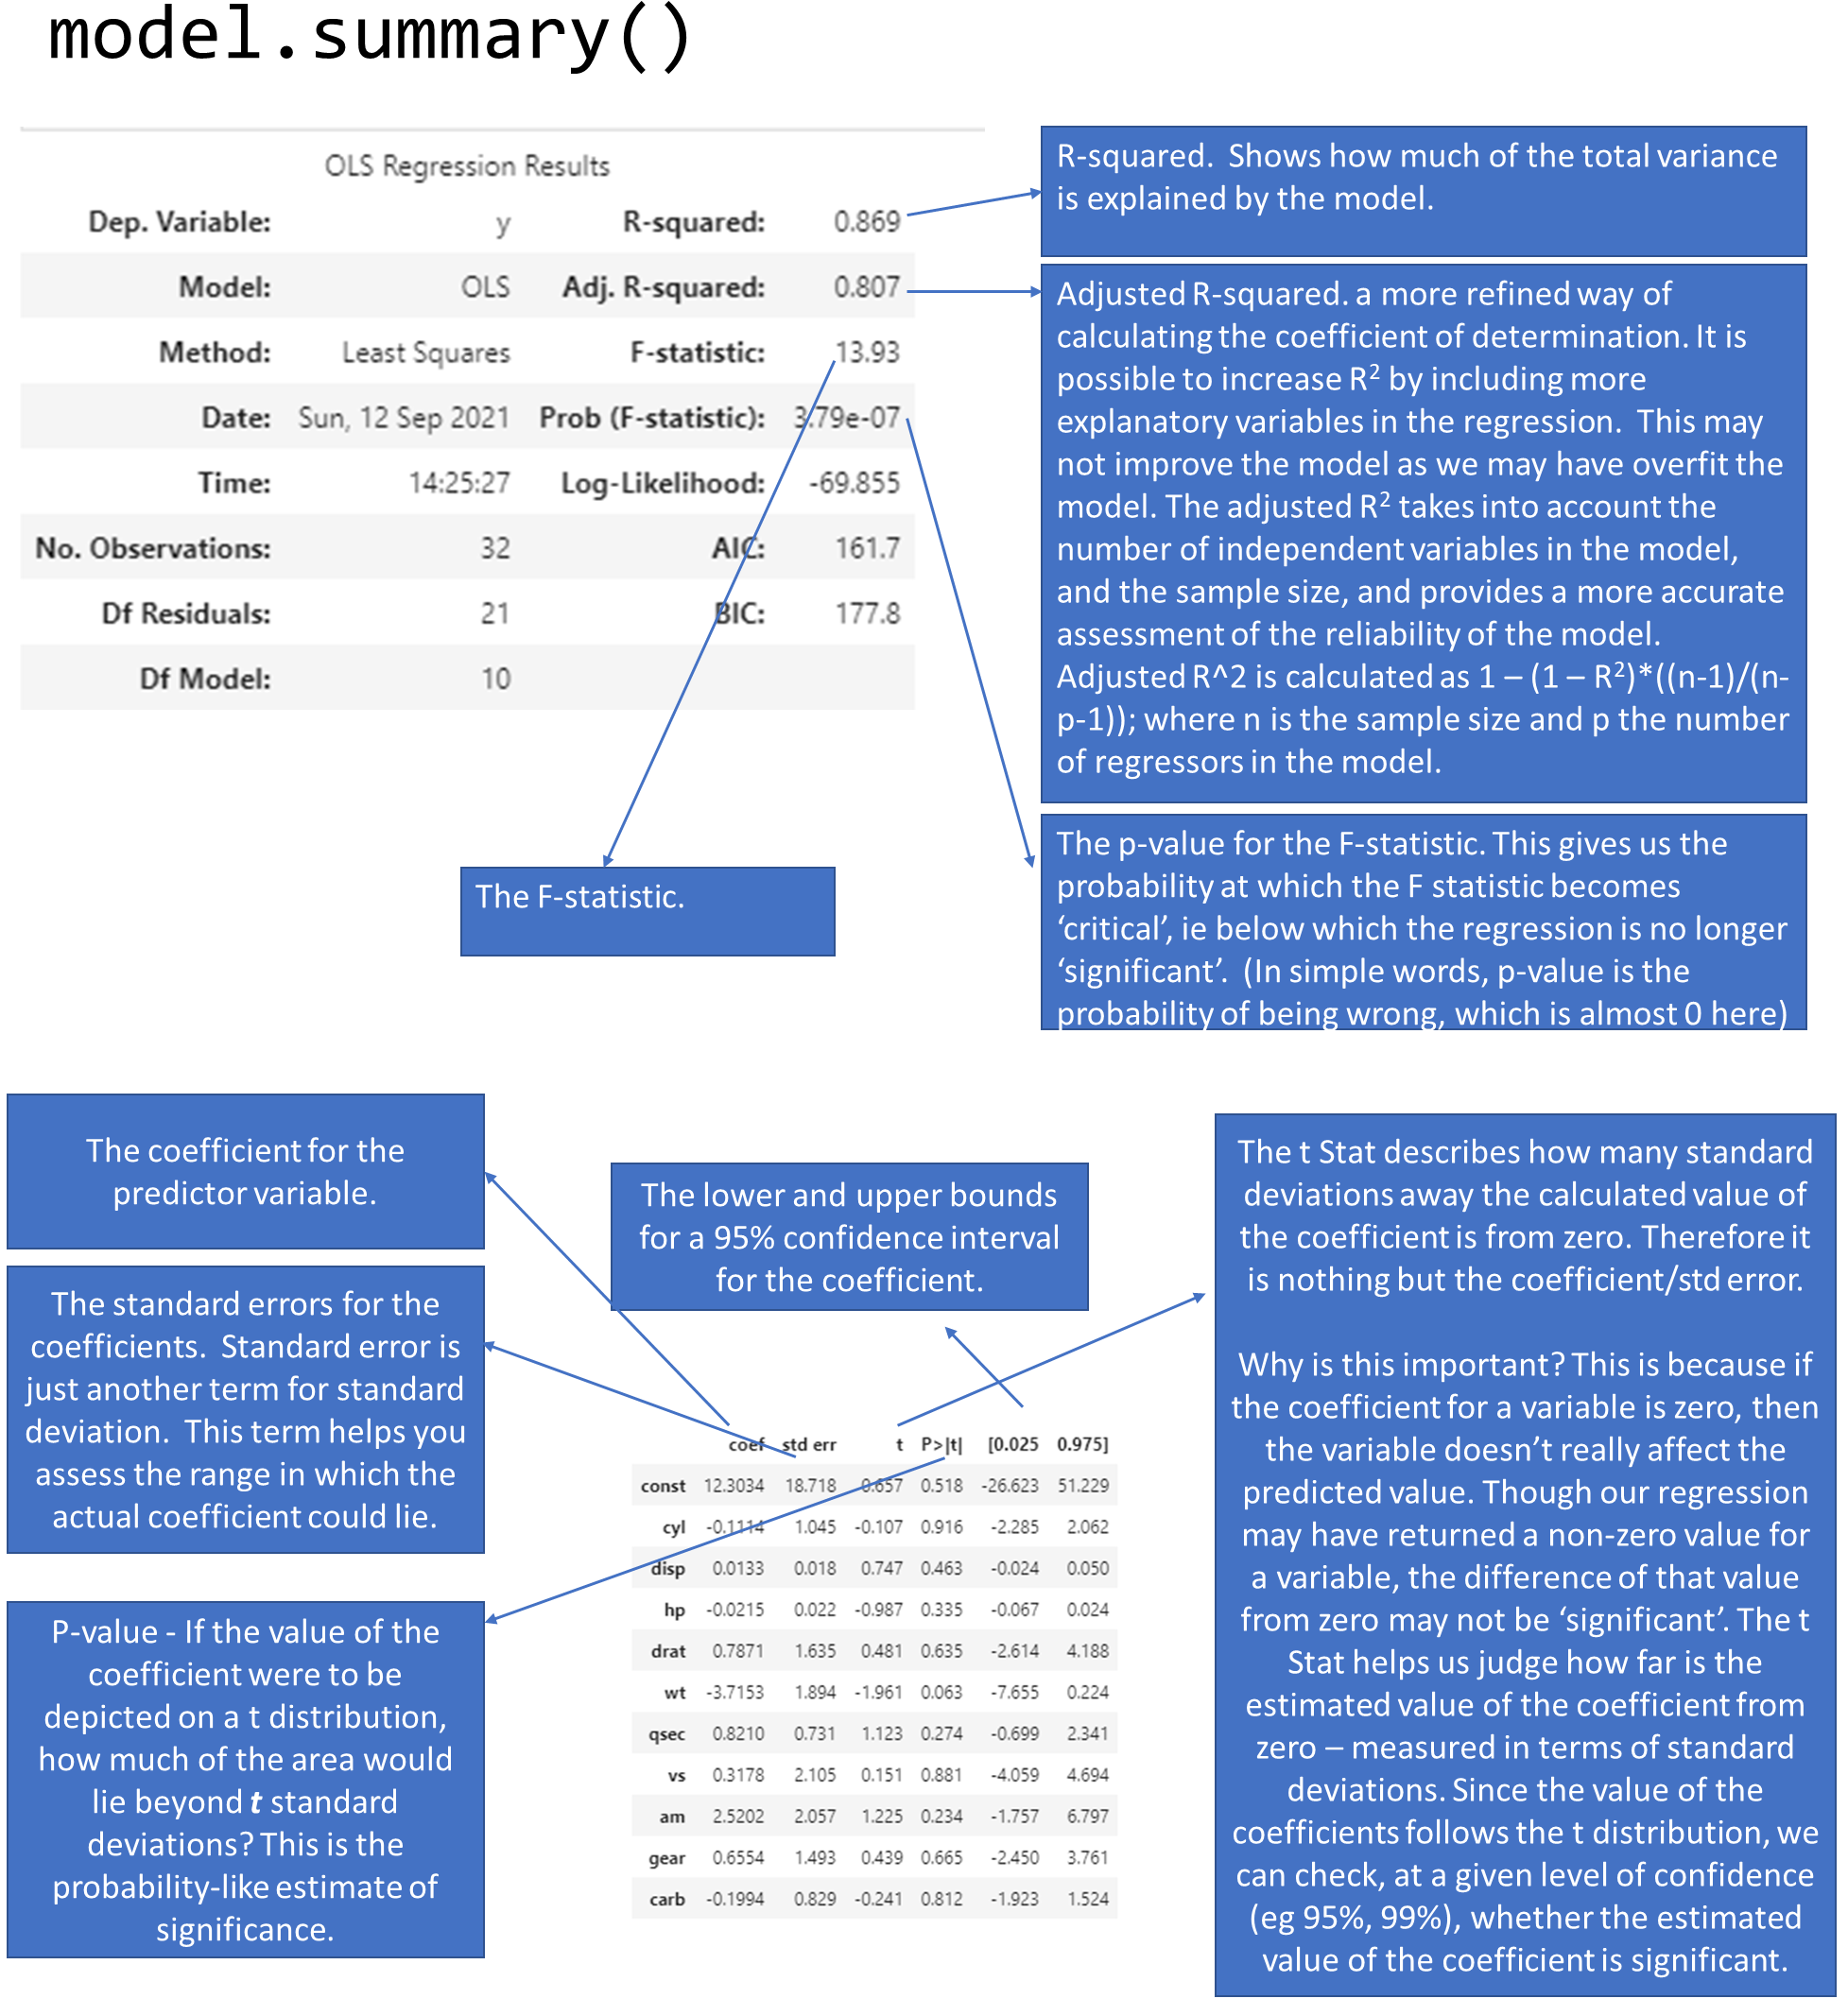

**Significance of the Model vs Significance of the Coefficients**

 - The model’s overall significance is judged by the value of the F-statistic.
 - Each individual coefficient also has a p-value, meaning individual coefficients may be statistically insignificant.
 - It is possible that the overall regression is significant, but none of the coefficients are.  These cases can be caused by multi-collinearity, but it does not prevent us from using the predictions from the model.  However it does limit our ability to definitively say which variables are the most important for our model.
    - If the reverse situation is true, ie the model isn’t significant but some of the variables have statistically significant coefficients, we can’t use the model.
 - If multi-collinearity needs to be addressed, we can do so by combining the independent variables that are correlated, eg using PCA.
 - For our goals of prediction in business, we are often more interested in being roughly right (and get a ‘lift’) than statistical elegance.

### Plot the Residuals

We mentioned that the residuals, or our $\epsilon$ term, are unexplained by the data.  Which means they should not show any pattern, and should appear to be completely random.  This is because any pattern should have been captured by our regression model and not show up in the residuals.  

Sometimes we do see a pattern because of the way our data is, and we want to make sure that is not the case.  

To check, the first thing we do is to plot the residuals.  We should not be able to discern any obvious pattern in the plot.  Which does not appear to be the case here. 

Often when we notice a non-random pattern, this is due to heteroscedasticity (which means that the variance of the feature set is not constant).  If we do notice heteroscedasticity, we may have to transform the inputs to get constant variance (eg, a logarithmic transform, or a Box-Cox transform).

Let us plot the residuals!


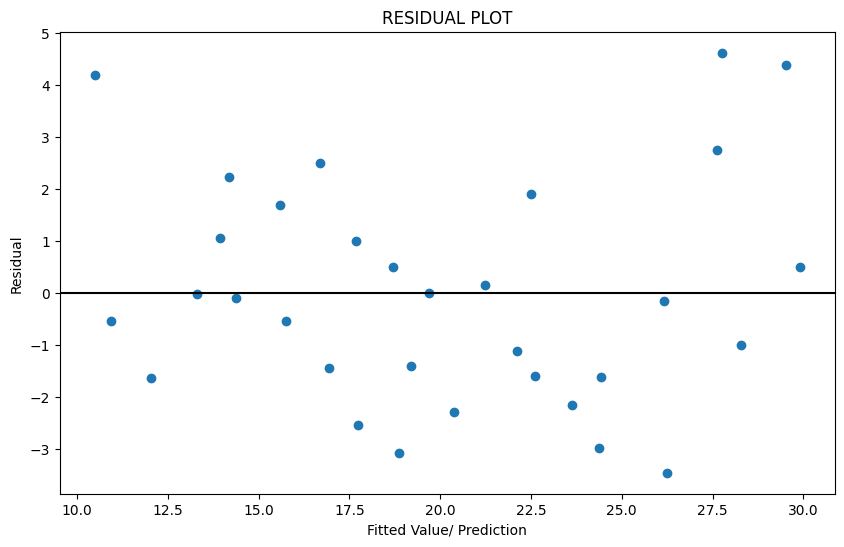

In [32]:
plt.figure(figsize = (10,6))
plt.scatter(compare.pred,model.resid)
plt.axhline(0, color='black')
plt.xlabel('Fitted Value/ Prediction')
plt.ylabel('Residual')
plt.title('RESIDUAL PLOT');

The residual plot is a scatterplot of the residuals vs the fitted value (prediction).  See the graphic above plotting the residuals for our miles-per-gallon model.
Do you think the residuals are randomly distributed? 


### Test for Heteroscedasticity - Breusch-Pagan test

OLS regression assumes that the data comes from a population with constant variance, or homoscedasticity.  

However, often that is not the case.  This situation is called heteroscedasticity.  This reflects itself in a pattern visible on the residual plot.  

The problem with heteroscedasticity is that the confidence intervals for the regression coefficients may be understated.  Which means we may consider something to be significant, when it is not.  

We can address heteroscedasticity by transforming the variables (eg using the Box-Cox transformation, which is covered later in feature engineering).  As a practical matter, heteroscedasticity may be difficult to identify visually from a residual plot, so we use a test for that.  

The **Breusch-Pagan test for heteroscedasticity** is a test of hypothesis that compares two hypothesis:  

 - H-0: Homoscedasticity is present.  
 - H-alt: Homoscedasticity is not present.  

Fortunately for us, we do not need to think too hard about the math as this is implemented for us in a function in statsmodels.  The function requires two variables as inputs: model residuals, and model inputs.  Once you have already created a model, these two are easy to get using model attributes.

If the p-value from the function is greater than our desired confidence, we conclude that the data has homoscedasticity.

**Interpreting the test**


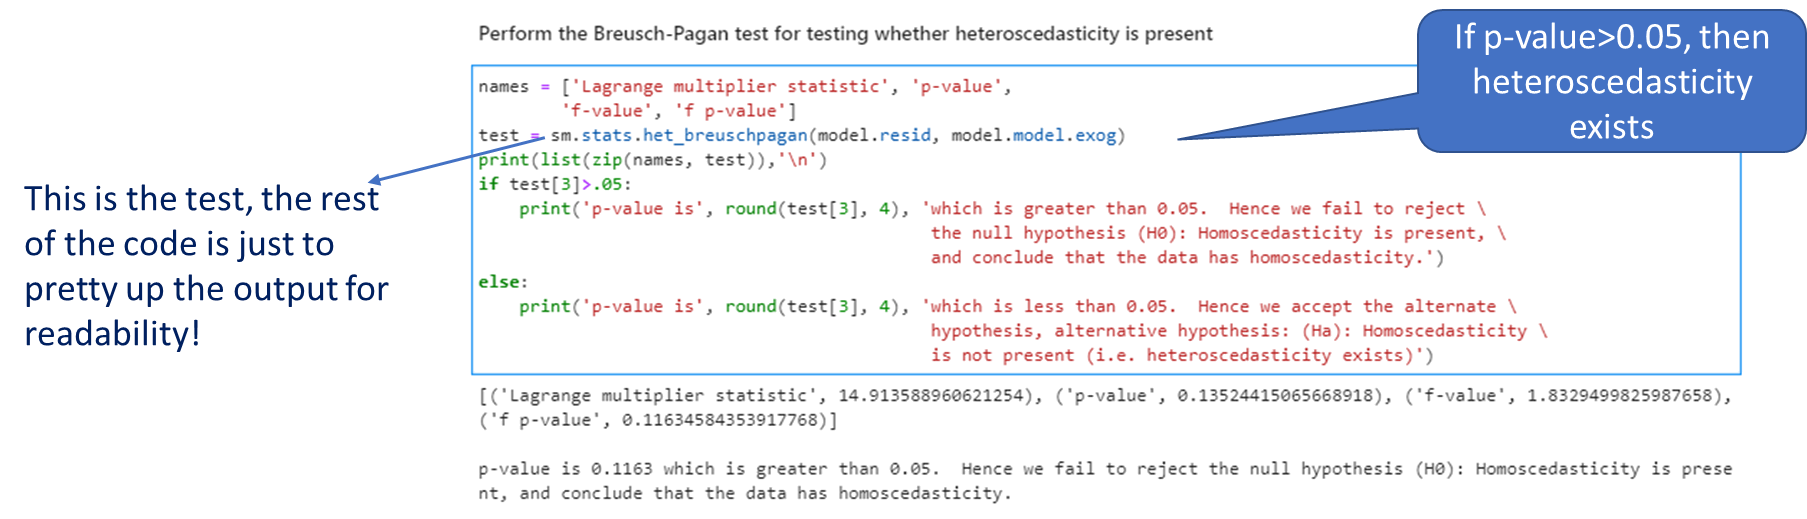

In [33]:
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sm.stats.het_breuschpagan(model.resid, model.model.exog)
print(list(zip(names, test)),'\n')
if test[3]>.05:
    print('p-value is', round(test[3], 4), 'which is greater than 0.05.  Hence we fail to reject \
                                            the null hypothesis (H0): Homoscedasticity is present, \
                                            and conclude that the data has homoscedasticity.')
else:
    print('p-value is', round(test[3], 4), 'which is less than 0.05.  Hence we accept the alternate \
                                            hypothesis, alternative hypothesis: (Ha): Homoscedasticity \
                                            is not present (i.e. heteroscedasticity exists)')

[('Lagrange multiplier statistic', 14.913588960622171), ('p-value', 0.13524415065665535), ('f-value', 1.8329499825989772), ('f p-value', 0.1163458435391346)] 

p-value is 0.1163 which is greater than 0.05.  Hence we fail to reject                                             the null hypothesis (H0): Homoscedasticity is present,                                             and conclude that the data has homoscedasticity.


### Summarizing
To assess the quality of a regression model, look for the following:
1. The estimate of the standard error of the regression.  Check how large the number is compared to the mean of the observed variable.  
2. The R-squared.  The closer the value of R-square is to 1, the better it is. (R-square will be a number between 0 and 1).  It tells you how much of the total variance in the target variable is explained by the regression model.  
3. Check for the significance of the R-squared by looking at the p-value for the F-statistic.  This is a probability-like number that estimates how likely is it to have obtained the R-square value by random chance.  The lower this is, the better.  
4. Examine the coefficients for each of the predictor variables.  Also look at the p-values for the predictors to see if they are significant.  
5. Finally, have a look at a plot of the residuals.  


### Understanding Sums of Squares
**ESS, TSS and RSS calculations**

$y_i$ is the actual observed value of the dependent variable, $\hat{y}$ is the value of the dependent variable according to the regression line, as predicted by our regression model. What we want to get is a feel for is the variability of actual $y$ around the regression line, ie, the volatility of $\epsilon$. This is given by the distance $y_i$ minus $\hat{y}$. Represented in the figure as RSS.

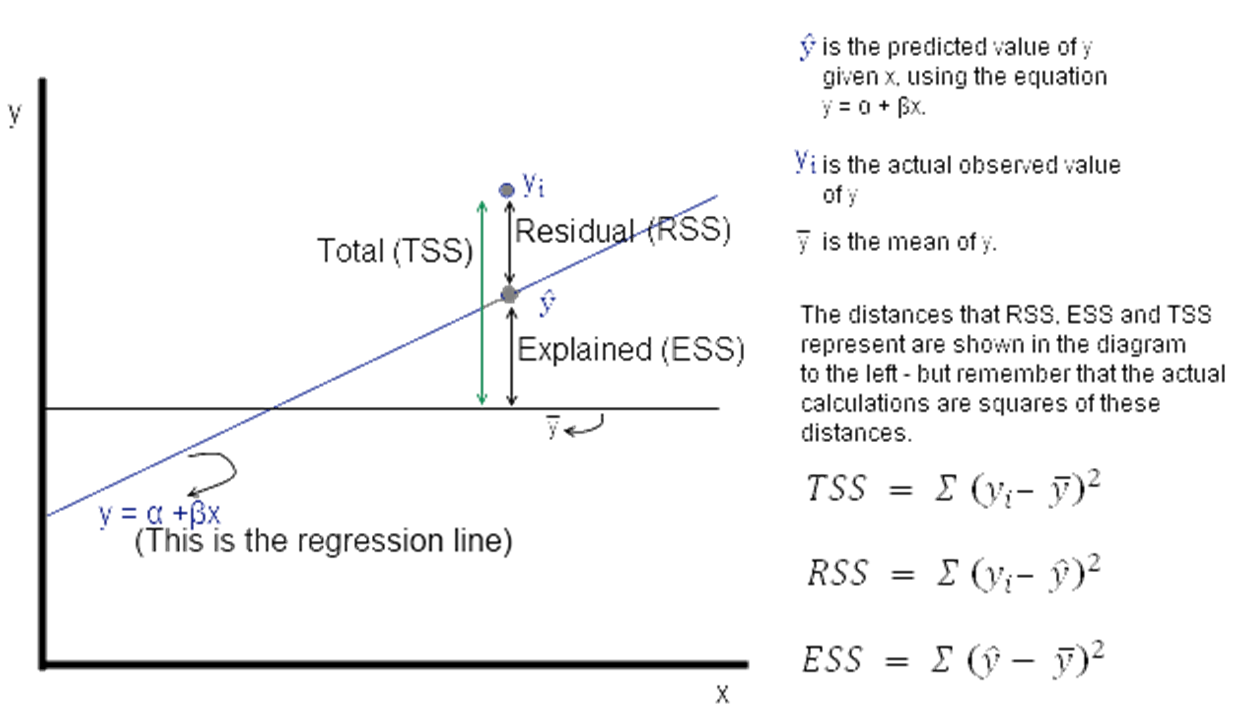


Now $\epsilon$ = observed – expected value of $y$

Thus, $\epsilon = y_i - \hat{y}$. The sum of $\epsilon$ is expected to be zero. So we look at the sum of squares:

The value of interest to us is $= \sum {(y_i - \hat{y})^2}$. Since this value will change as the number of observations change, we divide by 'n' to get a 'per observation' number. (Since this is a square, we take the root to get a more intuitive number, ie the RMS error explained a little while earlier. Effectively, RMS gives us the standard deviation of the variation of the actual values of y when compared to the observed values.)

If $s$ is the standard error of the regression, then
    $s = \sqrt{RSS/(n – 2)}$  

(where $n$ is the number of observations, and we subtract 2 from this to take away 2 degrees of freedom.)



In [34]:
y=mtcars.mpg.values
RSS = np.sum(model.resid**2)
TSS = np.sum((y - np.mean(y))**2)
ESS= model.ess
R_sq = 1 - RSS / TSS
print(R_sq)
print('RSS', RSS,'\nESS', model.ess, '\nTSS',  TSS)
print('ESS+RSS=',RSS+model.ess)
print('F value', ESS/(RSS/(30)))
print('ESS/TSS=', ESS/TSS)

0.8690157644777646
RSS 147.4944300166507 
ESS 978.5527574833491 
TSS 1126.0471874999998
ESS+RSS= 1126.0471874999998
F value 199.03519557441183
ESS/TSS= 0.8690157644777646


***
## Lasso and Ridge Regression

**Introduction**  
The setup:  
We saw multinomial regression expressed as:
$y =  \beta_0 + \beta_1 + \beta_2 + ... + \epsilon$  

We can combine all the $x_n$ variables into a single array, and call it $X$.  Similarly, we can combine the $\beta_n$ coefficients into another vector called $\beta$.  

Then the regression equation can be expressed as  
$y = X\beta + \epsilon$, which is a more succinct form.  


**Regularization**  
Regularization means adding a penalty to our objective function with a view to reducing complexity.  Complexity may appear in the form of:  
 - the number of variables in a model, and/or  
 - the value of the coefficients.  
 
**Why is complexity bad in models?**  
One reason: overfitting.  Complex models tend to fit well to training data, and do not generalize well.  

Another challenge with complexity in OLS regression is that the value of $\beta$ is very sensitive to changes in X.  What that means is adding a few new observations, or taking out a few can dramatically change the value of the coefficients in our vector $\beta$.  

This is because OLS will often determine coefficient values to be large numerical quantities that can fluctuate by large margins if the inputs change.  So:  

 - You have a less stable model, and
 - Your model likely suffers from overfitting

We address this problem by adding a penalty for coefficient values.  

**Modifying the objective function**  
In an OLS model, our objective function aims to minimize the sum of squares of the residuals.  It doesn’t care about how many variables it includes in the model (a variable is considered included in a model if it has a non-zero coefficient), or what the values of the coefficients are.  

But we can change our objective function to force it to consider our goals of reducing the weights.  We do this by adding to our objective function a cost that is related to the values of the weights.  Problem solved!  

*Current Objective Function: Minimize Least Squares of the Residuals*  

**Types of regularization**  
Two types of regularization:  
 - L1 regularization—The cost added is dependent on the absolute value of the weight coefficients (the L1 norm of the weights).  
   - L1 norm for a vector = sum of all elements  

*New Objective Function = Minimize (Least Squares of the Residuals + **L1_wt** * L1 norm for the coefficients vector)*  
_**When L1 regularization is applied, we call it _Lasso Regression_**_  

 - L2 regularization—The cost added is dependent on the square of the value of the weight coefficients (the L2 norm of the weights).  
    - L2 norm for a vector = sqrt of the sum of squares of all elements  

*New Objective Function = Minimize (Least Squares of the Residuals + $\alpha \cdot$ L2 norm for the coefficients vector)*  

**When L2 regularization is applied, we call it _Ridge Regression_**  


L1 and L2 norms are easily calculated using the `norm` function in `numpy.linalg`.

**How to calculate L1 norm manually**

In [35]:
np.linalg.norm([2,3], 1)

5.0

In [36]:
np.linalg.norm([-2,3], 1)

5.0

In [37]:
# same as sum of all elements
2 + 3

5

**How to calculate L2 norm manually**

In [38]:
np.linalg.norm([2,3], 2)

3.605551275463989

In [39]:
# same as the root of the sum of squares of the elements
np.sqrt(2**2 + 3**2)

3.605551275463989

### Lasso and Ridge regression Statsmodels

Fortunately, when doing lasso or ridge regression, we only need to specify the values of $\alpha$ and L1_wt, and the system does the rest for us.  

In the statsmodels implementation of Lasso and Ridge regression, the below function is minimized.

$0.5*RSS/n + alpha*((1-L1\_wt)*|params|_2^2/2 + L1\_wt*|params|_1)$

where RSS is the usual regression sum of squares, n is the sample size, and $|∗|_1$ and $|∗|_2$ are the L1 and L2 norms.

Alpha is the overall penalty weight.  It can be any number (ie, not just between 0 and 1).

The L1_wt parameter decides between L1 and L2 regularization.  Must be between 0 and 1 (inclusive). If 0, the fit is a ridge fit, if 1 it is a lasso fit. (Because 0 often causes a divide by 0 error, use something small like $1e-8$.)


**Example**  
Next, we look at an example.  Here is a summary of how to use statsmodels for regularized (ridge/lasso) regression:

 - In statsmodels, you have to specify at least two parameters to run Lasso/Ridge regression:
    - alpha
    - L1_wt
    - Remember that the function minimized is $0.5*RSS/n + alpha*((1-L1\_wt)*|params|_2^2/2 + L1\_wt*|params|_1)$
 - Alpha needs to be a value different from zero
 - L1_wt should be a number between 0 and 1.  
    - If L1_wt = 1, then you are doing Lasso/L1 regularization
    - If L1_wt = 0, then you are doing Ridge/L2 regularization (Note: in statsmodels, you can’t use L1_wt = 0, have to use a tiny	 non-zero number, eg 1e-8 instead)
    - Values between 0 and 1 weight the regularization between L1 and L2 penalties
 - You can run a grid-search to find the values of alpha and L1_wt that give you the best results. (Grid search means a brute force search through many parameter values.)
 - See an example of Ridge regression next.


We use the same mpg dataset as before.



In [40]:
model_reg = sm.regression.linear_model.OLS(y,X).fit_regularized(alpha = 1, L1_wt = .1, refit=True)

In [41]:
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     18.00
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.62e-08
Time:                        11:10:15   Log-Likelihood:                -73.602
No. Observations:                  32   AIC:                             163.2
Df Residuals:                      25   BIC:                             174.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
cyl                 0          0        nan        nan           0           0
disp          -0.0093      0.010     -0.979      0.337      -0.029       0.010
hp            -0.0025      0.020     -0.125      0.901      -0.043       0.038
drat           2.0389      1.482      1.376      0.181      -1.014       5.091
wt                  0          0        nan        nan           0           0
qsec           0.6674      0.272      2.456      0.021       0.108       1.227
vs                  0          0        nan        nan           0           0
am             3.1923      1.992      1.603      0.122      -0.910       7.294
gear           1.6071      1.359      1.183      0.248      -1.192       4.406
carb          -1.3805      0.573     -2.410      0.024      -2.560      -0.201
==============================================================================
Omnibus:                        0.280   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.467
Skew:                          -0.070   Prob(JB):                        0.792
Kurtosis:                       2.425   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# Comparing coefficients between normal OLS and Regularized Regression

pd.DataFrame({'model': model.params, 
              'model_reg': model_reg.params})

,model,model_reg
const,12.303374,0.000000
cyl,-0.111440,0.000000
disp,0.013335,-0.009334
hp,-0.021482,-0.002483
drat,0.787111,2.038859
wt,-3.715304,0.000000
qsec,0.821041,0.667390
vs,0.317763,0.000000
am,2.520227,3.192283
gear,0.655413,1.607129


In [43]:
mean_squared_error(model_reg.predict(X), y)

5.825422019252036

In [44]:
model_reg.params

array([ 0.00000000e+00,  0.00000000e+00, -9.33429540e-03, -2.48251056e-03,
        2.03885853e+00,  0.00000000e+00,  6.67389918e-01,  0.00000000e+00,
        3.19228288e+00,  1.60712882e+00, -1.38047254e+00])

***
## Polynomial Regression
Consider the data below.  The red line is the regression line with the following attributes:  
 > slope=-0.004549361971974567,  
 > intercept=0.6205433516646912,  
 > rvalue=-0.009903930817224469,  
 > pvalue=0.9455773121019574  
  
Clearly, not a very good fit.  
  
But it is pretty obvious that if the line could ‘curve’ a little bit, we would get a great fit.  


 LinregressResult(slope=-0.01664535648653696, intercept=0.6504247252274402, rvalue=-0.0357856416107069, pvalue=0.8051237652768873, stderr=0.06709426724362424, intercept_stderr=0.04918020345126021) 




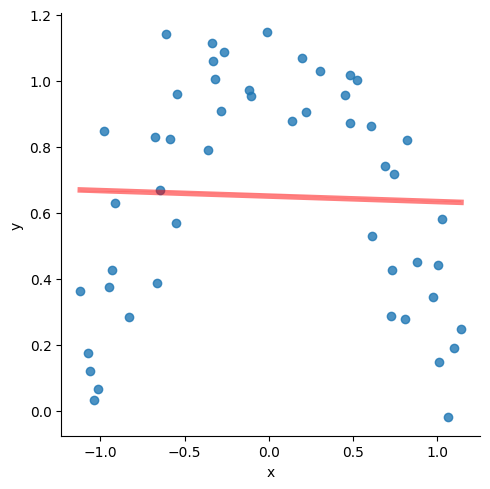

In [45]:
# Why Polynomial Regression?

df, labels = datasets.make_moons(noise=.1)
df = pd.DataFrame(df, columns = ['x', 'y'])
df['label'] = labels
df = df[df.label == 0]
# sns.scatterplot(data=df, x = df.iloc[:,0], y=df.iloc[:,1])
sns.lmplot(data=df, x = "x", y="y", line_kws={"lw":4,"alpha": .5, "color":"red"},ci=1)
print('\n', stats.linregress(x = df['x'], y = df['y']),'\n\n')

### A Layman’s take on 'Power Series Approximations'

Power series approximation allows you to express any function of $x$ as a summation of terms with increasing powers of $x$.  Therefore any function can be approximated as:

- Zero-th order estimation: $g_0 (x) = a$
- First order estimation: $g_1 (x) = a+bx$
- Second order estimation: $g_2 (x) = a+bx+c x^2$
- Third order estimation: $g_3 (x) = a+bx+c x^2+dx^3$

And so on.  Whatever is the maximum power of x in a function, it is that 'order' of approximation.
All you have to do is to find the values of the constants $a$, $b$, $c$ and $d$ in order to get the function.

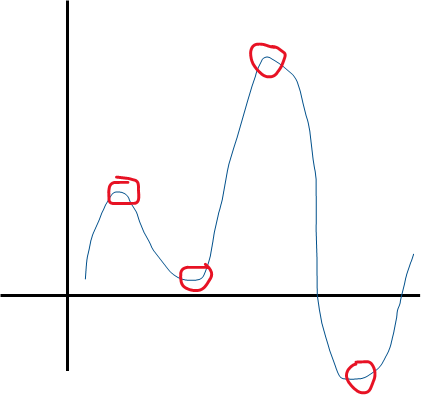

The number of 'U-turns' in a function’s graph plus 1 tell us the power of $x$ in the function.

So the function above can be approximated by a 4 + 1 = 5th order function.



### Polynomial Features Example

Polynomial regression is just OLS regression, but with polynomial features added to our $X$ predictors.  And we do that manually!!  Let us see how.

We first need to 'fit' polynomial features to data which in our case is $X$, and store this 'fit' in a variable we call, say $p_X$.  We can then transform any input to the polynomial feature set using `transform()`.  
  
Throughout our modeling journey, we will often see a difference between the fit and the transform methods.  `fit` creates the mechanism, `transform` implements it.  Sometimes these operations are combined in a single step using `fit_transform()`.  What we do depends upon our use case.  
  
The `PolynomialFeatures` function automatically inserts a constant, so if we use our $X$ as an input, we will get the constant term twice (as we had added a constant earlier using `add_constant`).  So we will use `features` instead of $X$.

> **Polynomial features** are powers of input features, eg for a feature vector $x$, these could be $x^2$,$x^3$ etc.
> 
> **Interaction features** are products of independent features.  For example, if $x_1$,$x_2$ are features, then $x_1 \cdot x_2$ would be an example of an interaction feature.

Interaction features are useful in the case of linear models – and often used in regression. Let us move to the example.

We create a random dataframe, and try to see what the polynomial and interaction features would be.


In [46]:
# Explaining polynomial features with a random example

from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np

data = pd.DataFrame.from_dict({
    'x1': np.random.randint(low=1, high=10, size=5),
    'x2': np.random.randint(low=1, high=10, size=5),
    'y': np.random.randint(low=1, high=10, size=5)
})
print('Dataset is:\n', data)
feat = data.iloc[:,:2].copy()
p = PolynomialFeatures(degree=2, interaction_only=False).fit(feat)
print('\nPolynomial and Interaction Feature names are:\n', 
      p.get_feature_names_out(feat.columns))


Dataset is:
    x1  x2  y
0   4   2  7
1   7   3  6
2   6   1  5
3   2   2  4
4   9   6  5

Polynomial and Interaction Feature names are:
 ['1' 'x1' 'x2' 'x1^2' 'x1 x2' 'x2^2']


In [47]:
features = pd.DataFrame(p.transform(feat), 
                        columns=p.get_feature_names_out(feat.columns))
print(features)

     1   x1   x2  x1^2  x1 x2  x2^2
0  1.0  4.0  2.0  16.0    8.0   4.0
1  1.0  7.0  3.0  49.0   21.0   9.0
2  1.0  6.0  1.0  36.0    6.0   1.0
3  1.0  2.0  2.0   4.0    4.0   4.0
4  1.0  9.0  6.0  81.0   54.0  36.0


This is how to read the above output:

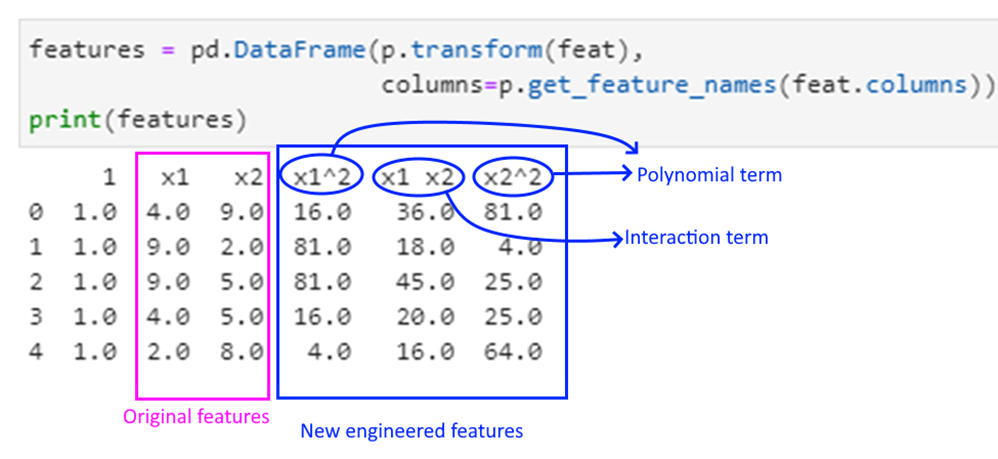


### Calculating polynomial features for mtcars

As mentioned earlier, polynomial regression is a form of regression analysis in which the relationship between the predictors ($X$) and the target variable ($y$) is modelled as an n-th degree polynomial in $x$. 

Polynomial regression allows us to fit a nonlinear relationship between $X$ and $y$.

So if we have $x_1$ and $x_2$ are the two predictors for $y$, the 2nd order polynomial regression equation would look as follows:

$y = a + b_1*x_1+b_2*x_2+ b_3*x_12+ b_4*x_22+ b_5*x_1*x_2+ \epsilon$

The product terms towards the end are called the ‘interaction terms’.


In [48]:
mtcars = sm.datasets.get_rdataset('mtcars').data
y = mtcars.mpg.values
features = mtcars.iloc[:,1:]

In [49]:
poly = PolynomialFeatures(degree=2, interaction_only=False).fit(features)

In [50]:
p_X = pd.DataFrame(poly.transform(features), columns=poly.get_feature_names_out(features.columns))
p_X.head()

,1,cyl,disp,hp,drat,wt,qsec,vs,am,gear,...,vs^2,vs am,vs gear,vs carb,am^2,am gear,am carb,gear^2,gear carb,carb^2
0,1.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,...,0.0,0.0,0.0,0.0,1.0,4.0,4.0,16.0,16.0,16.0
1,1.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,...,0.0,0.0,0.0,0.0,1.0,4.0,4.0,16.0,16.0,16.0
2,1.0,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,...,1.0,1.0,4.0,1.0,1.0,4.0,1.0,16.0,4.0,1.0
3,1.0,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,...,1.0,0.0,3.0,1.0,0.0,0.0,0.0,9.0,3.0,1.0
4,1.0,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,6.0,4.0


In [51]:
print(poly.get_feature_names_out(features.columns))

['1' 'cyl' 'disp' 'hp' 'drat' 'wt' 'qsec' 'vs' 'am' 'gear' 'carb' 'cyl^2'
 'cyl disp' 'cyl hp' 'cyl drat' 'cyl wt' 'cyl qsec' 'cyl vs' 'cyl am'
 'cyl gear' 'cyl carb' 'disp^2' 'disp hp' 'disp drat' 'disp wt'
 'disp qsec' 'disp vs' 'disp am' 'disp gear' 'disp carb' 'hp^2' 'hp drat'
 'hp wt' 'hp qsec' 'hp vs' 'hp am' 'hp gear' 'hp carb' 'drat^2' 'drat wt'
 'drat qsec' 'drat vs' 'drat am' 'drat gear' 'drat carb' 'wt^2' 'wt qsec'
 'wt vs' 'wt am' 'wt gear' 'wt carb' 'qsec^2' 'qsec vs' 'qsec am'
 'qsec gear' 'qsec carb' 'vs^2' 'vs am' 'vs gear' 'vs carb' 'am^2'
 'am gear' 'am carb' 'gear^2' 'gear carb' 'carb^2']


From the above, you can see:
```
Original features: ['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

Final Feature list:
['1', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb', 'cyl^2', 'cyl disp', 'cyl hp', 'cyl drat', 'cyl wt', 'cyl qsec', 'cyl vs', 'cyl am', 'cyl gear', 'cyl carb', 'disp^2', 'disp hp', 'disp drat', 'disp wt', 'disp qsec', 'disp vs', 'disp am', 'disp gear', 'disp carb', 'hp^2', 'hp drat', 'hp wt', 'hp qsec', 'hp vs', 'hp am', 'hp gear', 'hp carb', 'drat^2', 'drat wt', 'drat qsec', 'drat vs', 'drat am', 'drat gear', 'drat carb', 'wt^2', 'wt qsec', 'wt vs', 'wt am', 'wt gear', 'wt carb', 'qsec^2', 'qsec vs', 'qsec am', 'qsec gear', 'qsec carb', 'vs^2', 'vs am', 'vs gear', 'vs carb', 'am^2', 'am gear', 'am carb', 'gear^2', 'gear carb', 'carb^2']
```
Now $p_X$ contains our data frame with the polynomial features.  From this point, we do our regression the normal way.


In [52]:
model_poly = sm.OLS(y, p_X).fit()
print('R-squared is:')
model_poly.rsquared

R-squared is:


1.0

### Perform predictions

In [53]:
preds = pd.DataFrame({'PolynomialPred': model_poly.predict(p_X)}, columns = ['PolynomialPred'])

In [54]:
preds.index = mtcars.index
compare2 = pd.DataFrame(mtcars['mpg'])
compare2['PolynomialPred'] = preds.PolynomialPred
compare2['difference'] = compare2.mpg - compare2.PolynomialPred

compare2

,mpg,PolynomialPred,difference
rownames,,,
Mazda RX4,21.0,21.0,1.620037e-12
Mazda RX4 Wag,21.0,21.0,1.676881e-12
Datsun 710,22.8,22.8,3.961276e-12
Hornet 4 Drive,21.4,21.4,2.611955e-11
Hornet Sportabout,18.7,18.7,2.584599e-11
Valiant,18.1,18.1,1.300293e-11
Duster 360,14.3,14.3,3.925749e-12
Merc 240D,24.4,24.4,8.100187e-12
Merc 230,22.8,22.8,1.303846e-12


### Summary - Polynomial Regression
    

Here is how to approach polynomial regression:  
1. Decide the ‘order’ of the regression.  
2. Generate the polynomial features (unfortunately Python will not do it for us, though R has a feature to just specify the polynomial order).  
3. Perform a regression in a regular way, and evaluate the model.  
4. Perform predictions.  





***  
## LOESS Regression

LOESS stands for Locally Weighted Linear Regression. The idea behind LOESS is very similar to the idea behind k-nearest neighbors.  LOESS is a non-parametric regression method that focuses on data points closest to the one being predicted.  

A key decision then is how many points closest to the target to include in the regression.  Another decision is if any weighting be used to give greater weight to the points closest to the target.  Yet another decision is to whether use simple linear regression, or quadratic, etc.

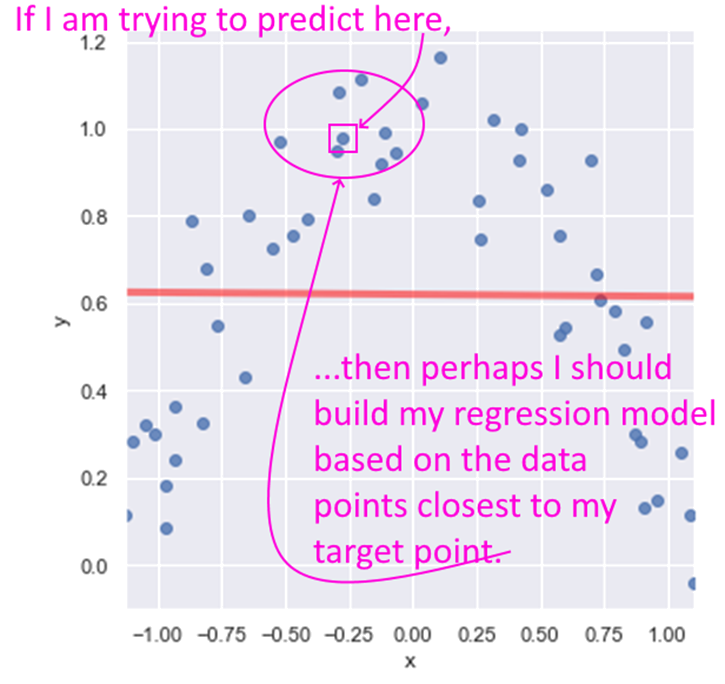

That The statsmodels implementation of LOESS does not allow the predict method.  If you need to implement predictions using LOESS, you may need to use R or another tool.  Besides, the LOESS model is very similar to the k-nearest neighbors algorithm which we will cover later.is all we will cover on LOESS.  





***
## Logistic Regression  

Logistic Regression is about class membership probability estimation.  What that means is that it is a categorization tool, and returns probabilities.  You do not use logistic regression for predicting continuous variables.

Classes are categories, and logistic regression helps us get estimates of an observation belonging to a particular class (spam/not-spam, will-respond/will-not-respond, etc).  We use the same framework as for linear models, but change the objective function as to get estimates of class probabilities. 

One might ask: why can’t we use normal linear regression for estimating class probabilities?  

The reason for that is that normal regression gives us results that are unbounded, whereas we need to bound probabilities to be between 0 and 1.  In other words, because $f(x) = \beta_0 + \beta_0 x_1 +  \beta_0 x_2 + ... + \epsilon$, $f(x)$ is unbounded and can go from $-\infty$ to $+\infty$, while we need probability estimates to be between 0 and 1.  

**How logistic regression solves this problem?**  
In order to address this problem (that normal regression gives us results that are not compatible with probabilities), we apply some mathematical transformations as follows:  

1. Instead of trying to predict probabilities, we can try to predict 'odds' instead, and work out the probability from the odds.  
2. Odds are the ratio of the probabilities of an event happening vs not happening. For example, a probability of 0.5 equates to the odds of 1, a probability of 0.25 equates to odds of 0.33 etc. $Odds = p/(1-p)$  
3. But odds vary from 0 to $\infty$, which doesn’t help us.  
4. However, if we take the log of the odds (log-odds), we get numbers that are between $-\infty$ to $+\infty$.  We can now build a regression model to predict these log-odds.  
5. These are the log-odds we get $f(x)$ in our regression model to represent.  
6. Then we can work backwards to calculate the probability.  


$log(p(x)/(1 - p(x))) = f(x) =  \beta_0 + \beta_0 x_1 +  \beta_0 x_2 + ... + \epsilon$  

$p(x) = \frac{1}{1 + e^{-f(x)}}$  

Read the above again if it doesn't register in one go!

**Interpreting logistic regression results**  
What do probability estimates mean, when training data is always either 0 or 1?

If a probability of say, 0.2, is identified by the model, it means that if you take 100 items that have their class membership probability estimated to be 0.2 then about 20 will actually belong to the class.



### Load the data  

We use a public domain dataset where we need to classify individuals as being with or without diabetes.  (_Source: https://www.kaggle.com/uciml/pima-indians-diabetes-database_)  

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.  The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.  The target variable is a category, tagged as 1 or 0 in the dataset.


In [55]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
df = pd.read_csv('diabetes.csv')

### Our workflow

To approach this problem in a structured way, we will perform the following steps:  

- Step 1: Load the data, do some EDA  
- Step 2: Prepare the data, and split into train-test sets  
- Step 3: Fit the model  
- Step 4: Evaluate the model  
- Step 5: Use for predictions  


### Review the data

Lete us load the data, and do some initial exploration.  The last column `Outcome` is our target variable, and the rest are features.  


In [56]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [57]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [58]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**What we see**: We notice that the mean of the different features appear to be on different scales.  We also see that correlations are generally not high, which is a good thing.  


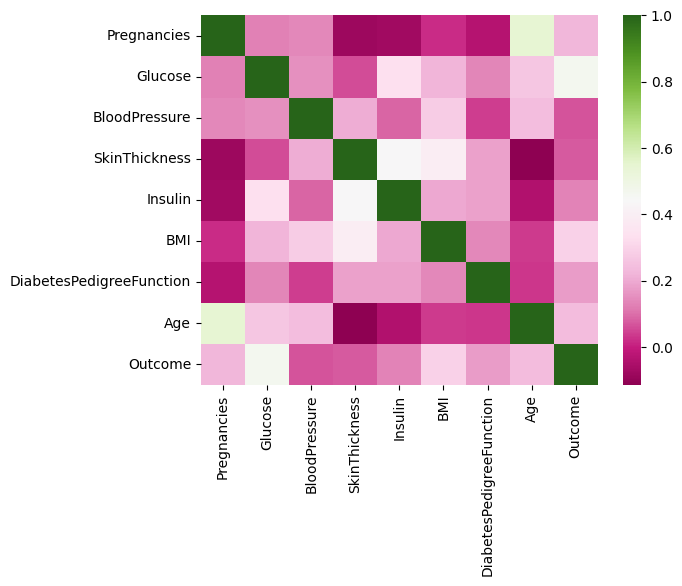

In [59]:
sns.heatmap(df.corr(numeric_only=True), cmap="PiYG");

### Prepare the data, and perform a train-test split

We standardize the data (because we saw the features to have different scales, or magnitudes).  Then we split it 75:25 into train and test sets.  


In [60]:
# Columns 0 to 8 are our predictors, or features
X = df.iloc[:,:8]

# Standard scale the features
scaler = preproc.StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))


# Add the intercept term/constant
X = sm.add_constant(X)

# The last column is our y variable, the target
y = df.Outcome

# Now we are ready to do the train-test split 75-25, with random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [61]:
X.columns

Index(['const', 0, 1, 2, 3, 4, 5, 6, 7], dtype='object')

In [62]:
X_train

,const,0,1,2,3,4,5,6,7
118,1.0,0.046014,-0.747831,-0.470732,0.154533,-0.692891,-0.481351,-0.087210,-0.956462
205,1.0,0.342981,-0.309671,0.149641,0.468173,-0.692891,-1.027104,-0.195934,-0.531023
506,1.0,-1.141852,1.849832,1.080200,0.342717,0.088570,0.572079,-0.476805,0.149679
587,1.0,0.639947,-0.560048,-0.160546,-1.288212,-0.692891,-0.976336,-0.673113,-0.360847
34,1.0,1.827813,0.034598,0.459827,0.656358,-0.692891,-0.557503,0.121178,1.000557
...,...,...,...,...,...,...,...,...,...
645,1.0,-0.547919,1.129998,0.253036,0.907270,3.127584,0.940144,-1.020427,-0.275760
715,1.0,0.936914,2.068912,-0.987710,0.781814,2.710805,0.242089,1.069496,0.064591
72,1.0,2.718712,0.159787,1.080200,-1.288212,-0.692891,1.447821,0.335607,0.745293
235,1.0,0.046014,1.568158,0.149641,-1.288212,-0.692891,1.473205,0.021514,-0.616111


In [63]:
y_train

118    0
205    0
506    1
587    0
34     0
      ..
645    0
715    1
72     1
235    1
37     1
Name: Outcome, Length: 576, dtype: int64

### Create a model using the Statsmodels library

Fitting the model is a one line task with Statsmodels, with a call to the function.


In [64]:
model = sm.Logit(y_train, X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.474074
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  576
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            8
Date:                Mon, 09 Oct 2023   Pseudo R-squ.:                  0.2646
Time:                        11:10:17   Log-Likelihood:                -273.07
converged:                       True   LL-Null:                       -371.29
Covariance Type:            nonrobust   LLR p-value:                 3.567e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8721      0.111     -7.853      0.000      -1.090      -0.654
0              0.3975      0.123      3.230      0.001       0.156       0.639
1              1.1319      0.138      8.191      0.000       0.861       1.403
2             -0.2824      0.111     -2.543      0.011      -0.500      -0.065
3             -0.0432      0.129     -0.336      0.737      -0.295       0.209
4             -0.0835      0.127     -0.658      0.510      -0.332       0.165
5              0.7206      0.138      5.214      0.000       0.450       0.991
6              0.1972      0.111      1.781      0.075      -0.020       0.414
7              0.1623      0.126      1.286      0.198      -0.085       0.410
==============================================================================
"""

### Run the model on the test set, and build a confusion matrix

Review the model summary above. How is it different from the regression summary we examined earlier?  How do we know the model is doing its job?  

Next, we evaluate the model by studying the confusion matrix and the classification report.  Below, we use a threshold of 0.50 to classify disease as 1 or 0. By moving this threshold around, you can control the instance of false positives and false negatives.



In [65]:
# Create predictions.  Note that predictions give us probabilities, not classes!
pred_prob = model.predict(X_test)

# Set threshold for identifying class 1
threshold = 0.50

# Convert probabilities to 1s and 0s based on threshold
pred = (pred_prob>threshold).astype(int)
 
# confusion matrix
cm = confusion_matrix(y_test, pred)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pred))

Confusion Matrix : 
 [[109  14]
 [ 29  40]]
Test accuracy =  0.7760416666666666


In [66]:
cm = confusion_matrix(y_test, pred)
pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,109,14
Actual 1,29,40


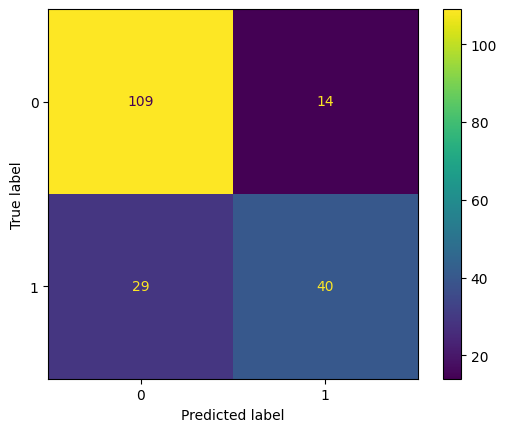

In [67]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

In [68]:
print(classification_report(y_true = y_test, y_pred = pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



In [69]:
# See what predicted probabilities look like
pred_prob

285    0.428174
101    0.317866
581    0.148071
352    0.048148
726    0.209056
         ...   
247    0.759754
189    0.362025
139    0.205588
518    0.244546
629    0.061712
Length: 192, dtype: float64

<Axes: >

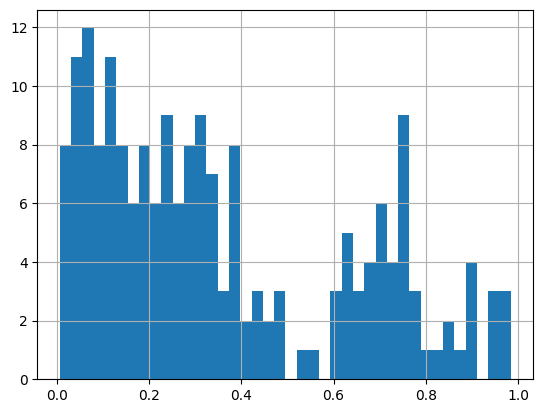

In [70]:
# A histogram of probabilities.  Why not?
pred_prob.hist(bins=40)

### Predict a new case

Next time when a new patient comes in, you can predict with 77.6% accuracy the incidence of disease based on other things you know about them.

Use `model.predict(X)`, where $X$ is the vector of the attributes of the new patient.

Remember to scale $X$ first using the preprocessing step of standardization by using the same scaler we had set up earlier (as to use the same $\mu$ and $\sigma$)!  

We get a probability estimate of about 5.6%, which we can evaluate based on our threshold.  


In [71]:
# let us see what our original data looks like
df.sample(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100,88,60,110,46.8,0.962,31,0


In [72]:
# Also let us see what our model consumes
X_test.sample(1)

,const,0,1,2,3,4,5,6,7
527,1.0,-0.250952,-0.153185,0.253036,-0.347291,0.218813,-0.722498,-1.10197,-0.786286


In [73]:
# Let us now create a dataframe with a new case with imaginary values

new_case = pd.DataFrame({'Pregnancies': [1],
                        'Glucose':[100],
                        'BloodPressure': [110],
                        'SkinThickness': [40],
                        'Insulin': [145],
                        'BMI': [25],
                        'DiabetesPedigreeFunction': [0.8],
                        'Age': [52]})
new_case

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,100,110,40,145,25,0.8,52


In [74]:
# Remember to scale the data using the scaler defined earlier

X_new = scaler.transform(new_case)

# Next, insert a first column for constant=1
X_new = np.insert(X_new,0, 1)

In [75]:
# Our new data on which to predict looks like this: 

X_new

array([ 1.        , -0.84488505, -0.65393918,  2.11415525,  1.22091023,
        0.56612934, -0.88749274,  0.99097251,  1.59617091])

In [76]:
# We can now predict to see the probability of disease in this new case

model.predict(X_new)

array([0.05570774])

### AUC and ROC calculation

In [77]:
# AUC calculation
metrics.roc_auc_score(y_test, pred_prob)

0.8502415458937198

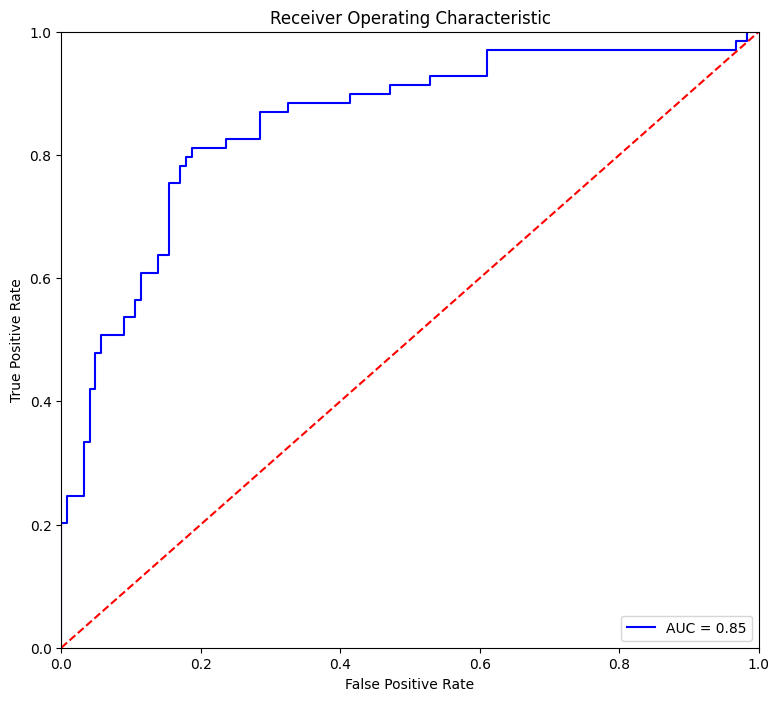

In [78]:
# Source for code below: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



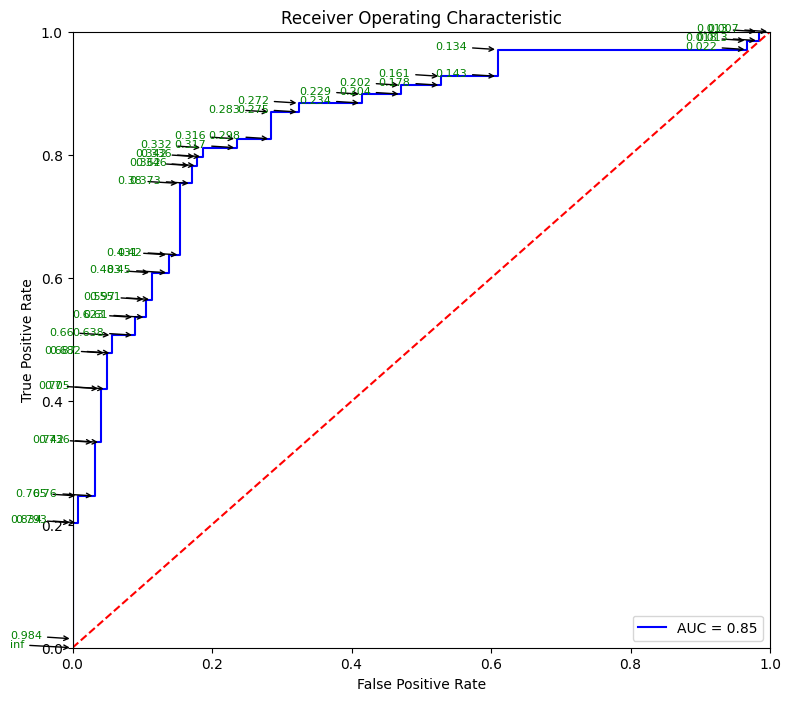

In [79]:
# Source for code below: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
for i, txt in enumerate(thresholds):
    plt.annotate(text = round(txt,3), xy = (fpr[i], tpr[i]),  
                 xytext=(-45, 0), textcoords='offset points',
                 arrowprops=dict(arrowstyle="->"), color='green',fontsize=8)
plt.show()



In [80]:
pd.DataFrame({'TPR': tpr, 'FPR': fpr, 'Threshold': thresholds}).sort_values(by = ['Threshold']).reset_index(drop=True)

,TPR,FPR,Threshold
0,1.000000,1.000000,0.007175
1,1.000000,0.983740,0.012744
2,0.985507,0.983740,0.013068
3,0.985507,0.967480,0.018312
4,0.971014,0.967480,0.021612
5,0.971014,0.609756,0.133697
6,0.927536,0.609756,0.142601
7,0.927536,0.528455,0.161013
8,0.913043,0.528455,0.178360
9,0.913043,0.471545,0.201957


#### Format the confusion matrix for readability

In [81]:
cm_clean = pd.DataFrame(cm, index = np.unique(y_test), columns = np.unique(pred))
cm_clean.index = pd.MultiIndex.from_arrays([['Actual'] * len(cm_clean.index), cm_clean.index], names=(None,None))
cm_clean.columns = pd.MultiIndex.from_arrays([['Predicted'] * len(cm_clean.columns), cm_clean.columns], names=(None,None))
cm_clean

Predicted    
                 0   1
Actual 0       109  14
       1        29  40

### EXTRA - Create model using the sklearn library

In [82]:
# For running this, you need to convert all column names to be strings first
X_train.columns = [str(p) for p in X_train.columns]
X_test.columns = [str(p) for p in X_test.columns]

In [83]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.7760416666666666


In [84]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

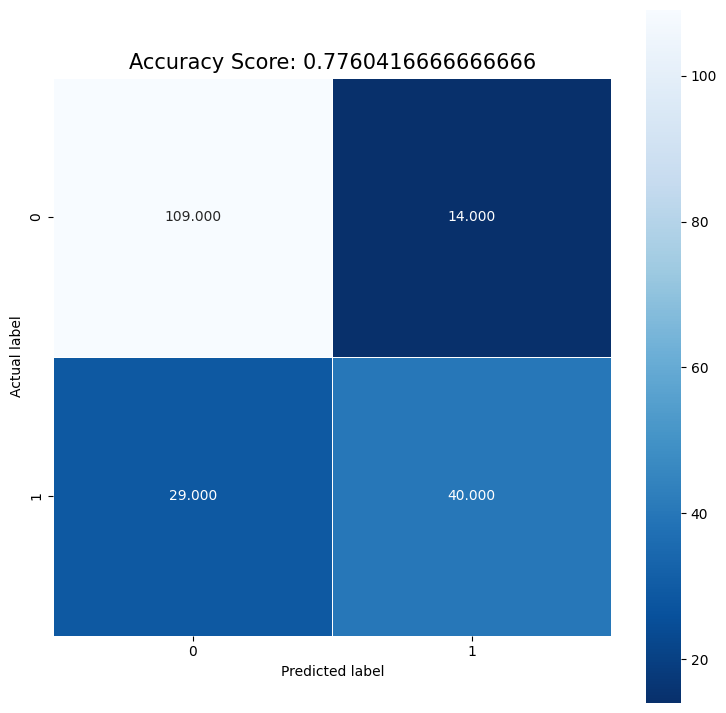

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

***
### End here
***

***
## Visualizing Logistic Regression

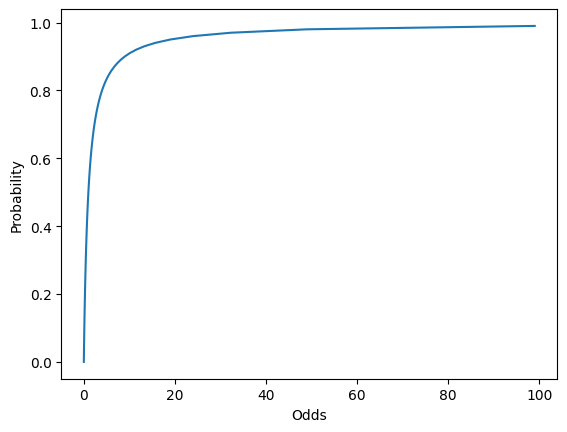

In [86]:
# Plotting Probability vs Odds

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'Probability': np.arange(0,1, 0.01), \
                   'Odds':np.arange(0,1., 0.01) / \
                   (1-np.arange(0,1., 0.01)) })
sns.lineplot(data = df, x = 'Odds', y = 'Probability');

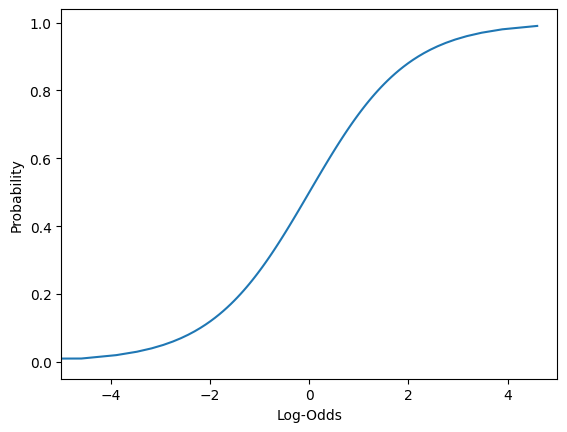

In [87]:
# Plotting log-odds
# We add a very tiny number, 1e-15 (10 to the power -15) to avoid the divide by zero error for the log function
plt.xlim(-5,5)
sns.lineplot(data = df, x = np.log(df['Odds'] + 1e-15), 
             y = 'Probability',)
plt.xlabel("Log-Odds");

***
**Regression Discussion Ends here**  
***
## Generating correlated variables


Correlation matrix
           x         y
x  1.000000  0.674776
y  0.674776  1.000000
                x           y
count  100.000000  100.000000
mean     1.951571    4.113860
std      0.889982    1.307528
min     -0.248931    1.448414
25%      1.414760    3.027437
50%      1.948933    4.007710
75%      2.448277    4.990499
max      3.776177    7.698143

 LinregressResult(slope=0.9913551037238383, intercept=2.179160237385691, rvalue=0.674776046612476, pvalue=1.3862196337186816e-14, stderr=0.10952825894875075, intercept_stderr=0.23472739741968757)


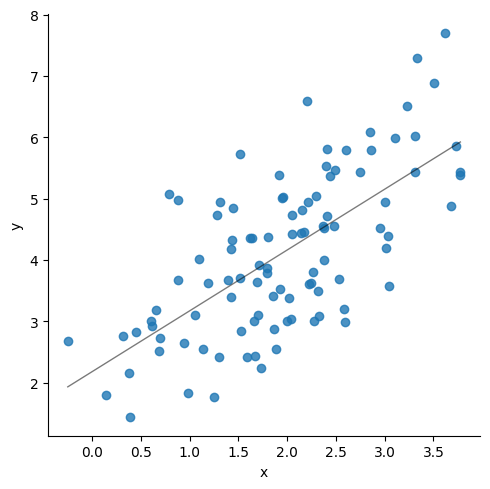

In [88]:
### Generating correlated variables
### Specify the mean of the two variables (mean),
### Then the correlation between them (corr),
### and finally, the standard deviation of each of them (stdev).
### Also specify the number of observations needed (size).

### Update the below three lines
mean = np.array([2,4])
corr = np.array([.75])
stdev = np.array([1, 1.5])
size = 100

### Generate the nu,bers
cov = np.prod(stdev)*corr
cov_matrix = np.array([[stdev[0]**2, cov[0]],
                      [cov[0], stdev[1]**2]], dtype = 'float')

df = np.random.multivariate_normal(mean= mean, cov=cov_matrix, size=size)
df = pd.DataFrame(df, columns = ['x', 'y'])
# sns.scatterplot(data=df, x = df.iloc[:,0], y=df.iloc[:,1])
sns.lmplot(data=df, x = "x", y="y", line_kws={"lw":1,"alpha": .5, "color":"black"}, ci=1)
print('Correlation matrix\n',df.corr())
print(df.describe())
print('\n', stats.linregress(x = df['x'], y = df['y']))

Correlation matrix
           x         y
x  1.000000  0.938708
y  0.938708  1.000000
                x           y
count  100.000000  100.000000
mean     1.941827    3.909270
std      0.891419    1.264443
min     -0.538156    1.071548
25%      1.280355    3.076545
50%      1.951114    3.949149
75%      2.577518    4.662989
max      4.048922    7.232895

 LinregressResult(slope=1.3315207519102974, intercept=1.3236862821400872, rvalue=0.9387084455256821, pvalue=4.007268726355597e-47, stderr=0.04939247007849392, intercept_stderr=0.10544308813782269)


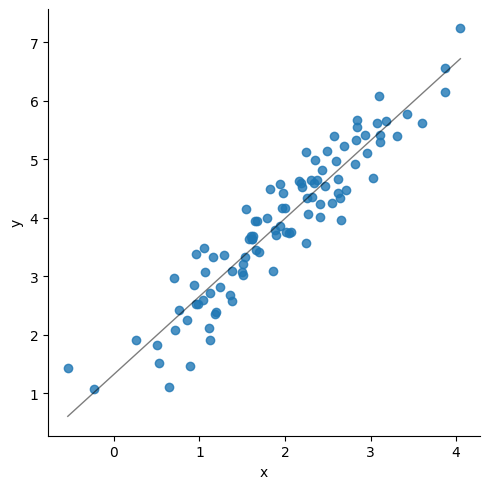

In [89]:
### Update the below three lines
mean = np.array([2,4])
corr = np.array([.95])
stdev = np.array([1, 1.5])
size = 100

### Generate the numbers
cov = np.prod(stdev)*corr
cov_matrix = np.array([[stdev[0]**2, cov[0]],
                      [cov[0], stdev[1]**2]], dtype = 'float')

df = np.random.multivariate_normal(mean= mean, cov=cov_matrix, size=size)
df = pd.DataFrame(df, columns = ['x', 'y'])
# sns.scatterplot(data=df, x = df.iloc[:,0], y=df.iloc[:,1])
sns.lmplot(data=df, x = "x", y="y", line_kws={"lw":1,"alpha": .5, "color":"black"},ci=1)
print('Correlation matrix\n',df.corr())
print(df.describe())
print('\n', stats.linregress(x = df['x'], y = df['y']))

In [90]:
model2 = sm.OLS(endog = df.y, exog = sm.add_constant(df.x), hasconst=True).fit()
model2.mse_resid**.5
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     726.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.01e-47
Time:                        11:10:22   Log-Likelihood:                -58.350
No. Observations:                 100   AIC:                             120.7
Df Residuals:                      98   BIC:                             125.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3237      0.105     12.554      0.000       1.114       1.533
x              1.3315      0.049     26.958      0.000       1.234       1.430
==============================================================================
Omnibus:                        1.095   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                1.171
Skew:                          -0.186   Prob(JB):                        0.557
Kurtosis:                       2.623   Cond. No.                         6.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""